In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from tqdm import tqdm
import time

train = pd.read_csv("CSV_train.csv",low_memory=False,delimiter=';')
test=pd.read_csv("CSV_test.csv",low_memory=False,delimiter=',')
hidden=pd.read_csv("CSV_hidden_test.csv",low_memory=False,delimiter=',')

In [2]:
# storing length of datasets 
train_len = train.shape[0] 
test_len = test.shape[0]
All_data = pd.concat((train,test,hidden)).reset_index(drop=True) 

lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
All_data['Lithology'] = All_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)
All_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,Lithology
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,Shale
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,Shale
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,Shale
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,Shale
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,35/9-7,2973.2988,536096.06250,6793022.0,-2943.444580,BAAT GP.,Etive Fm.,8.276272,NaN,2.820439,...,136.911575,NaN,0.502458,NaN,2.311106,24.306124,NaN,65000,2.0,Shale
1429690,35/9-7,2973.4508,536096.06250,6793022.0,-2943.595947,BAAT GP.,Etive Fm.,8.267273,NaN,3.020778,...,137.583923,NaN,0.374753,NaN,1.853418,22.201078,NaN,65000,2.0,Shale
1429691,35/9-7,2973.6028,536096.06250,6793022.0,-2943.747559,BAAT GP.,Etive Fm.,8.250099,NaN,2.795711,...,138.310898,NaN,0.211487,NaN,1.325961,20.096741,NaN,65000,2.0,Shale
1429692,35/9-7,2973.7548,536096.06250,6793022.0,-2943.899170,BAAT GP.,Etive Fm.,NaN,NaN,2.658694,...,137.592819,NaN,0.147950,NaN,1.260347,17.992323,NaN,65000,2.0,Shale


In [3]:
#dropping columns with high missing values
drop_cols = ['SGR', 'ROPA', 'RXO', 'MUDWEIGHT','DCAL','RMIC','FORCE_2020_LITHOFACIES_CONFIDENCE']
All_data_drop = All_data.drop(drop_cols, axis=1)
# encoding categorical variables
All_data_drop['GROUP_encoded'] = All_data_drop['GROUP'].astype('category')
All_data_drop['GROUP_encoded'] = All_data_drop['GROUP_encoded'].cat.codes

All_data_drop['FORMATION_encoded'] = All_data_drop['FORMATION'].astype('category')
All_data_drop['FORMATION_encoded'] = All_data_drop['FORMATION_encoded'].cat.codes

All_data_drop['WELL_encoded'] = All_data_drop['WELL'].astype('category')
All_data_drop['WELL_encoded'] = All_data_drop['WELL_encoded'].cat.codes

All_data_drop['Lithology_encoded'] = All_data_drop['Lithology'].astype('category')
All_data_drop['Lithology_encoded'] = All_data_drop['Lithology_encoded'].cat.codes

In [4]:
All_data_drop

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,BS,ROP,DTS,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY,Lithology,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,34.636410,NaN,-0.574928,65000,Shale,6,-1,1,10
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,34.636410,NaN,-0.570188,65000,Shale,6,-1,1,10
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,34.779556,NaN,-0.574245,65000,Shale,6,-1,1,10
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,39.965164,NaN,-0.586315,65000,Shale,6,-1,1,10
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,57.483765,NaN,-0.597914,65000,Shale,6,-1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,35/9-7,2973.2988,536096.06250,6793022.0,-2943.444580,BAAT GP.,Etive Fm.,8.276272,NaN,2.820439,...,8.5,15.195305,136.911575,0.502458,65000,Shale,0,16,113,10
1429690,35/9-7,2973.4508,536096.06250,6793022.0,-2943.595947,BAAT GP.,Etive Fm.,8.267273,NaN,3.020778,...,8.5,15.770223,137.583923,0.374753,65000,Shale,0,16,113,10
1429691,35/9-7,2973.6028,536096.06250,6793022.0,-2943.747559,BAAT GP.,Etive Fm.,8.250099,NaN,2.795711,...,8.5,16.418465,138.310898,0.211487,65000,Shale,0,16,113,10
1429692,35/9-7,2973.7548,536096.06250,6793022.0,-2943.899170,BAAT GP.,Etive Fm.,NaN,NaN,2.658694,...,8.5,17.037945,137.592819,0.147950,65000,Shale,0,16,113,10


In [5]:
#dropping categorial features replaces beforehan by encoded features
drop2 = All_data_drop.drop(['GROUP', 'FORMATION','WELL','FORCE_2020_LITHOFACIES_LITHOLOGY','Lithology'], axis=1)

# splitting dataset into training, test, and hidden sets
train_prep = drop2[:train_len].copy()
test_prep = drop2[train_len:(train_len+test_len)].copy()
hidden_prep = drop2[(train_len+test_len):].copy()

In [6]:
drop2

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,...,161.131180,24.612379,NaN,34.636410,NaN,-0.574928,6,-1,1,10
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,...,160.603470,23.895531,NaN,34.636410,NaN,-0.570188,6,-1,1,10
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,...,160.173615,23.916357,NaN,34.779556,NaN,-0.574245,6,-1,1,10
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,...,160.149429,23.793688,NaN,39.965164,NaN,-0.586315,6,-1,1,10
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,...,160.128342,24.104078,NaN,57.483765,NaN,-0.597914,6,-1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,2973.2988,536096.06250,6793022.0,-2943.444580,8.276272,NaN,2.820439,3.158570,NaN,90.720284,...,75.260658,NaN,8.5,15.195305,136.911575,0.502458,0,16,113,10
1429690,2973.4508,536096.06250,6793022.0,-2943.595947,8.267273,NaN,3.020778,3.332977,NaN,87.062027,...,74.868301,NaN,8.5,15.770223,137.583923,0.374753,0,16,113,10
1429691,2973.6028,536096.06250,6793022.0,-2943.747559,8.250099,NaN,2.795711,3.044179,NaN,86.115921,...,74.848122,NaN,8.5,16.418465,138.310898,0.211487,0,16,113,10
1429692,2973.7548,536096.06250,6793022.0,-2943.899170,NaN,NaN,2.658694,2.847681,NaN,89.497131,...,74.964027,NaN,8.5,17.037945,137.592819,0.147950,0,16,113,10


In [7]:
train_prep1= train_prep.copy()
test_prep1= test_prep.copy()
hidden_prep1= hidden_prep.copy()

In [8]:
#Inputing missing values by introducing median 
from sklearn.impute import SimpleImputer
miss = SimpleImputer(missing_values=np.nan, strategy='median')
miss.fit(drop2)
All_imp = miss.fit_transform(drop2)
All_imp=pd.DataFrame(All_imp, columns=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DRHO',
         'GROUP_encoded',
       'FORMATION_encoded', 'WELL_encoded','Lithology_encoded'])
All_imp

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,1.398049,1.611410,1.798681,1.884186,80.200851,...,161.131180,24.612379,12.250001,34.636410,189.362198,-0.574928,6.0,-1.0,1.0,10.0
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,1.398049,1.618070,1.795641,1.889794,79.262886,...,160.603470,23.895531,12.250001,34.636410,189.362198,-0.570188,6.0,-1.0,1.0,10.0
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,1.398049,1.626459,1.800733,1.896523,74.821999,...,160.173615,23.916357,12.250001,34.779556,189.362198,-0.574245,6.0,-1.0,1.0,10.0
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,1.398049,1.621594,1.801517,1.891913,72.878922,...,160.149429,23.793688,12.250001,39.965164,189.362198,-0.586315,6.0,-1.0,1.0,10.0
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,1.398049,1.602679,1.795299,1.880034,71.729141,...,160.128342,24.104078,12.250001,57.483765,189.362198,-0.597914,6.0,-1.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,2973.2988,536096.06250,6793022.0,-2943.444580,8.276272,1.398049,2.820439,3.158570,2.331407,90.720284,...,75.260658,54.270451,8.500000,15.195305,136.911575,0.502458,0.0,16.0,113.0,10.0
1429690,2973.4508,536096.06250,6793022.0,-2943.595947,8.267273,1.398049,3.020778,3.332977,2.331407,87.062027,...,74.868301,54.270451,8.500000,15.770223,137.583923,0.374753,0.0,16.0,113.0,10.0
1429691,2973.6028,536096.06250,6793022.0,-2943.747559,8.250099,1.398049,2.795711,3.044179,2.331407,86.115921,...,74.848122,54.270451,8.500000,16.418465,138.310898,0.211487,0.0,16.0,113.0,10.0
1429692,2973.7548,536096.06250,6793022.0,-2943.899170,12.515673,1.398049,2.658694,2.847681,2.331407,89.497131,...,74.964027,54.270451,8.500000,17.037945,137.592819,0.147950,0.0,16.0,113.0,10.0


In [9]:
# print(All_imp['GR'].quantile(0.50)) 
# print(All_imp['GR'].quantile(0.95)) 
# All_imp['GR'] = np.where(All_imp['GR'] > 150, 67, All_imp['GR'])
# All_imp['GR'].describe()

In [10]:
All_imp.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
count,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,...,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06,1.429694e+06
mean,2.216632e+03,4.846857e+05,6.680881e+06,-2.166097e+03,1.306219e+01,5.929846e+00,4.633407e+00,1.105773e+01,2.297625e+00,7.047302e+01,...,1.122697e+02,5.615993e+01,1.198030e+01,6.489179e+01,1.935923e+02,1.135653e-02,6.681300e+00,3.683317e+01,5.681314e+01,9.139322e+00
std,9.929555e+02,3.509749e+04,1.311172e+05,9.554058e+02,3.575119e+00,7.092686e+01,5.001560e+01,1.067479e+02,2.336318e-01,3.408658e+01,...,2.886977e+01,6.174737e+01,2.396487e+00,9.435014e+02,3.622618e+01,6.215910e+00,3.148458e+00,2.368314e+01,3.279013e+01,1.501331e+00
min,1.360860e+02,4.232375e+05,6.406641e+06,-5.395563e+03,2.344000e+00,1.000000e-04,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,7.415132e+00,-9.990000e+02,6.000000e+00,-1.179770e-01,6.916318e+01,-7.429339e+03,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,1.457365e+03,4.544695e+05,6.590310e+06,-2.833309e+03,9.973806e+00,1.398049e+00,9.265758e-01,9.104230e-01,2.131772e+00,4.737605e+01,...,8.842327e+01,4.287162e+01,1.225000e+01,1.929947e+01,1.893622e+02,-5.890843e-03,5.000000e+00,1.800000e+01,3.200000e+01,9.000000e+00
50%,2.121598e+03,4.786488e+05,6.737678e+06,-2.088677e+03,1.251567e+01,1.398049e+00,1.455281e+00,1.453520e+00,2.331407e+00,6.786042e+01,...,1.083101e+02,5.427045e+01,1.225000e+01,1.929947e+01,1.893622e+02,3.207336e-03,6.000000e+00,3.700000e+01,5.500000e+01,1.000000e+01
75%,2.895131e+03,5.201532e+05,6.784878e+06,-1.435200e+03,1.521438e+01,1.398049e+00,2.593216e+00,2.593180e+00,2.471782e+00,8.924216e+01,...,1.387327e+02,6.511991e+01,1.225000e+01,1.929947e+01,1.893622e+02,1.877124e-02,9.000000e+00,5.800000e+01,8.300000e+01,1.000000e+01
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2.193905e+03,1.988616e+03,1.999887e+03,3.457820e+00,1.141292e+03,...,3.204789e+02,5.265473e+02,2.600000e+01,4.701512e+04,6.765781e+02,2.836938e+00,1.300000e+01,6.900000e+01,1.170000e+02,1.100000e+01


In [11]:
All_imp.clip(lower=All_imp.quantile(0.05), upper=All_imp.quantile(0.98), axis=1)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
0,729.48095,437780.34375,6470972.5,-518.136710,19.480835,1.398049,1.611410,1.798681,1.899048,80.200851,...,161.131180,24.612379,12.250001,34.636410,189.362198,-0.031164,6.0,-1.0,3.0,10.0
1,729.48095,437780.34375,6470972.5,-518.136710,19.468800,1.398049,1.618070,1.795641,1.899048,79.262886,...,160.603470,23.895531,12.250001,34.636410,189.362198,-0.031164,6.0,-1.0,3.0,10.0
2,729.48095,437780.34375,6470972.5,-518.136710,19.468800,1.398049,1.626459,1.800733,1.899048,74.821999,...,160.173615,23.916357,12.250001,34.779556,189.362198,-0.031164,6.0,-1.0,3.0,10.0
3,729.48095,437780.34375,6470972.5,-518.136710,19.459282,1.398049,1.621594,1.801517,1.899048,72.878922,...,160.149429,23.793688,12.250001,39.965164,189.362198,-0.031164,6.0,-1.0,3.0,10.0
4,729.48095,437780.34375,6470972.5,-518.136710,19.453100,1.398049,1.602679,1.795299,1.899048,71.729141,...,160.128342,24.104078,12.250001,57.483765,189.362198,-0.031164,6.0,-1.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,2973.29880,536096.06250,6793022.0,-2943.444580,8.409431,1.398049,2.820439,3.158570,2.331407,90.720284,...,75.260658,54.270451,8.500000,15.195305,154.237827,0.121060,2.0,16.0,113.0,10.0
1429690,2973.45080,536096.06250,6793022.0,-2943.595947,8.409431,1.398049,3.020778,3.332977,2.331407,87.062027,...,74.868301,54.270451,8.500000,15.770223,154.237827,0.121060,2.0,16.0,113.0,10.0
1429691,2973.60280,536096.06250,6793022.0,-2943.747559,8.409431,1.398049,2.795711,3.044179,2.331407,86.115921,...,74.848122,54.270451,8.500000,16.418465,154.237827,0.121060,2.0,16.0,113.0,10.0
1429692,2973.75480,536096.06250,6793022.0,-2943.899170,12.515673,1.398049,2.658694,2.847681,2.331407,89.497131,...,74.964027,54.270451,8.500000,17.037945,154.237827,0.121060,2.0,16.0,113.0,10.0


In [12]:
train_imp = All_imp[:train_len].copy()
test_imp = All_imp[train_len:(train_len+test_len)].copy()
hidden_imp = All_imp[(train_len+test_len):].copy()

In [13]:
print(train_imp.shape)
print(test_imp.shape)
print(hidden_imp.shape)

(1170511, 22)
(136786, 22)
(122397, 22)


In [14]:
train_imp

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,1.398049,1.611410,1.798681,1.884186,80.200851,...,161.131180,24.612379,12.250001,34.636410,189.362198,-0.574928,6.0,-1.0,1.0,10.0
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,1.398049,1.618070,1.795641,1.889794,79.262886,...,160.603470,23.895531,12.250001,34.636410,189.362198,-0.570188,6.0,-1.0,1.0,10.0
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,1.398049,1.626459,1.800733,1.896523,74.821999,...,160.173615,23.916357,12.250001,34.779556,189.362198,-0.574245,6.0,-1.0,1.0,10.0
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,1.398049,1.621594,1.801517,1.891913,72.878922,...,160.149429,23.793688,12.250001,39.965164,189.362198,-0.586315,6.0,-1.0,1.0,10.0
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,1.398049,1.602679,1.795299,1.880034,71.729141,...,160.128342,24.104078,12.250001,57.483765,189.362198,-0.597914,6.0,-1.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,478648.81250,6737678.5,-2088.677002,8.423170,1.398049,1.455281,1.453520,2.527984,77.654900,...,108.310127,54.270451,8.500000,27.674368,189.362198,-0.001763,11.0,7.0,117.0,8.0
1170507,3169.4644,478648.81250,6737678.5,-2088.677002,8.379244,1.398049,1.455281,1.453520,2.537613,75.363937,...,108.310127,54.270451,8.500000,28.024338,189.362198,-0.007600,11.0,7.0,117.0,9.0
1170508,3169.6164,478648.81250,6737678.5,-2088.677002,8.350248,1.398049,1.455281,1.453520,2.491860,66.452843,...,108.310127,54.270451,8.500000,28.091282,189.362198,-0.018297,11.0,7.0,117.0,9.0
1170509,3169.7684,478648.81250,6737678.5,-2088.677002,8.313779,1.398049,1.455281,1.453520,2.447539,55.784817,...,108.310127,54.270451,8.500000,28.019775,189.362198,-0.011438,11.0,7.0,117.0,9.0


In [15]:
train_imp.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
count,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,...,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06
mean,2.184087e+03,4.855668e+05,6.681795e+06,-2.138068e+03,1.313538e+01,6.406896e+00,4.869328e+00,1.060410e+01,2.291382e+00,7.091370e+01,...,1.130094e+02,5.852595e+01,1.206421e+01,7.327165e+01,1.916435e+02,1.079367e-02,6.619940e+00,3.644059e+01,5.752154e+01,9.169452e+00
std,9.971821e+02,3.440346e+04,1.276749e+05,9.664750e+02,3.657786e+00,7.401863e+01,5.375806e+01,1.134141e+02,2.357325e-01,3.423149e+01,...,2.896434e+01,6.584702e+01,2.548096e+00,1.042454e+03,2.798447e+01,6.869625e+00,3.136000e+00,2.394241e+01,3.196306e+01,1.455014e+00
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,1.000000e-04,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,7.415132e+00,-9.990000e+02,6.000000e+00,-1.179770e-01,6.916318e+01,-7.429339e+03,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00
25%,1.418597e+03,4.548019e+05,6.593126e+06,-2.804552e+03,9.882808e+00,1.296196e+00,9.290146e-01,9.148633e-01,2.123109e+00,4.762722e+01,...,8.907137e+01,4.205721e+01,1.225000e+01,1.929947e+01,1.893622e+02,-6.882701e-03,5.000000e+00,1.800000e+01,3.400000e+01,9.000000e+00
50%,2.076605e+03,4.777699e+05,6.737314e+06,-2.055283e+03,1.251567e+01,1.398049e+00,1.455281e+00,1.449790e+00,2.331407e+00,6.836763e+01,...,1.083101e+02,5.427045e+01,1.225000e+01,1.929947e+01,1.893622e+02,3.207336e-03,6.000000e+00,3.700000e+01,5.600000e+01,1.000000e+01
75%,2.864393e+03,5.201314e+05,6.784877e+06,-1.397964e+03,1.574931e+01,1.510922e+00,2.587100e+00,2.537876e+00,2.462978e+00,8.903551e+01,...,1.393171e+02,7.039606e+01,1.225000e+01,1.929947e+01,1.893622e+02,1.555134e-02,9.000000e+00,5.800000e+01,8.500000e+01,1.000000e+01
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2.193905e+03,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,3.204789e+02,5.265473e+02,2.600000e+01,4.701512e+04,6.765781e+02,2.836938e+00,1.300000e+01,6.900000e+01,1.170000e+02,1.100000e+01


In [16]:


# calculating p-impedance
train_imp['PI'] = train_imp.RHOB * (1e6/train_imp.DTC)
test_imp['PI'] = test_imp.RHOB * (1e6/test_imp.DTC)
hidden_imp['PI'] = hidden_imp.RHOB * (1e6/hidden_imp.DTC)

# calculating s-impedance
train_imp['SI'] = train_imp.RHOB * (1e6/train_imp.DTS) 
test_imp['SI'] = test_imp.RHOB * (1e6/test_imp.DTS) 
hidden_imp['SI'] = hidden_imp.RHOB * (1e6/hidden_imp.DTS) 

#calculating Shear modulus (G)
train_imp['G'] = ((1e6/train_imp.DTS)**2) * train_imp.RHOB
test_imp['G'] = ((1e6/test_imp.DTS)**2) * test_imp.RHOB
hidden_imp['G'] = ((1e6/hidden_imp.DTS)**2) * hidden_imp.RHOB

#calculating Bulk modulus (K)
train_imp['K'] = (((1e6/train_imp.DTC)**2) * train_imp.RHOB) - (4 * train_imp.G/3)
test_imp['K'] = (((1e6/test_imp.DTC)**2) * test_imp.RHOB) - (4 * test_imp.G/3)
hidden_imp['K'] = (((1e6/hidden_imp.DTC)**2) * hidden_imp.RHOB) - (4 * hidden_imp.G/3)

# calculate the shale volume
train_imp["VSHALE"] = (train_imp.GR - np.min(train_imp.GR)) / (np.max(train_imp.GR) - np.min(train_imp.GR))
test_imp["VSHALE"] = (test_imp.GR - np.min(test_imp.GR)) / (np.max(test_imp.GR) - np.min(test_imp.GR))
hidden_imp["VSHALE"] = (hidden_imp.GR - np.min(hidden_imp.GR)) / (np.max(hidden_imp.GR) - np.min(hidden_imp.GR))
#train_imp1.head()

# calculate the total porosity
train_imp['PHIT'] = np.sqrt(((((train_imp.NPHI)*(train_imp.NPHI)+(train_imp.RHOB)*(train_imp.RHOB))))/2)
test_imp['PHIT'] = np.sqrt(((((test_imp.NPHI)*(test_imp.NPHI)+(test_imp.RHOB)*(test_imp.RHOB))))/2)
hidden_imp['PHIT'] = np.sqrt(((((hidden_imp.NPHI)*(hidden_imp.NPHI)+(hidden_imp.RHOB)*(hidden_imp.RHOB))))/2)
#train_imp1.tail()

# calculate effective porosity
train_imp['PHIE'] = train_imp.PHIT*(1-train_imp.VSHALE)
train_imp = train_imp[train_imp['PHIE'] !=0]
train_imp['PHIE'] = train_imp['PHIE'].abs() 

test_imp['PHIE'] = test_imp.PHIT*(1-test_imp.VSHALE)
test_imp = test_imp[test_imp['PHIE'] !=0]
test_imp['PHIE'] = test_imp['PHIE'].abs() 

hidden_imp['PHIE'] = hidden_imp.PHIT*(1-hidden_imp.VSHALE)
hidden_imp = hidden_imp[hidden_imp['PHIE'] !=0]
hidden_imp['PHIE'] = hidden_imp['PHIE'].abs() 
#train_imp1.tail()

# # display the log for preview
# plt.figure(figsize=(5,10))
# plt.subplot(122)
# plt.title('PHIE')
# plt.plot('PHIE', 'SI','PI','G','K','VSHALE','DEPTH_MD', data=train_imp)
# plt.gca().invert_yaxis()

C:\Users\Ayori\AppData\Local\Temp/ipykernel_13656/3060712503.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imp['PHIE'] = train_imp['PHIE'].abs()


In [17]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
x_header=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DRHO','K','G','VSHALE','PHIT','PHIE','SI','PI',
       'GROUP_encoded', 'FORMATION_encoded', 'WELL_encoded']
y_header=['Lithology_encoded']
x_train = train_imp[x_header]
y_train = train_imp[y_header]
x_test = test_imp[x_header]
y_test = test_imp[y_header]
x_hidden = hidden_imp[x_header]
y_hidden = hidden_imp[y_header]

##Min-Max scaler 
scaler = MinMaxScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_hidden_scaled = x_hidden.copy()

x_train_scaled.iloc[:,:25] = scaler.fit_transform(x_train_scaled.iloc[:,:25])
x_test_scaled.iloc[:,:25] = scaler.transform(x_test_scaled.iloc[:,:25])
x_hidden_scaled.iloc[:,:25] = scaler.transform(x_hidden_scaled.iloc[:,:25])

In [18]:
#Supervised Algorithms
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsRegressor
from pprint import pprint
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
#Comparing base models accuracies by using k-fold cross validation - 10 folds

from sklearn.model_selection import cross_val_score



model_xgb = XGBClassifier(n_estimators=1000, max_depth=4,
                                 booster='gbtree', objective='multi:softprob',
                                 learning_rate=0.075, random_state=42,
                                 subsample=1, colsample_bytree=1,
                                 verbose=2020, reg_lambda=1500)

model_xgb.fit(x_train_scaled, y_train.values.ravel(), early_stopping_rounds=100, eval_set=[(x_test, y_test)], verbose=100)

train_pred_xgb = model_xgb.predict(x_train_scaled)
open_pred_xgb = model_xgb.predict(x_test_scaled)
hidden_pred_xgb = model_xgb.predict(x_hidden_scaled)
#Printing Reports 


#Printing Reports


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:

[01:26:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:27:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.40247
[100]	validation_0-mlogloss:1.60523
[200]	validation_0-mlogloss:1.42884
[300]	validation_0-mlogloss:1.40461
[400]	validation_0-mlogloss:1.36105
[500]	validation_0-mlogloss:1.35189
[581]	validation_0-mlogloss:1.37185


In [19]:
A = np.load('penalty_matrix.npy')
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

In [20]:
from sklearn.metrics import classification_report, accuracy_score
print('-----------------------TRAIN SET REPORT---------------------')
print("Open set RMSE:", np.sqrt(mean_squared_error(y_train, train_pred_xgb)))
print('Open set penalty matrix score:', score(y_train.values, train_pred_xgb))
print('Open set report:', classification_report(y_train, train_pred_xgb))
print('-----------------------OPEN SET REPORT---------------------')
print("Open set RMSE:", np.sqrt(mean_squared_error(y_test, open_pred_xgb)))
print('Open set penalty matrix score:', score(y_test.values, open_pred_xgb))
print('Open set report:', classification_report(y_test, open_pred_xgb))
print('-----------------------HIDDEN SET REPORT---------------------')
print("Hidden set RMSE:", np.sqrt(mean_squared_error(y_hidden, hidden_pred_xgb)))
print('Hidden set penalty matrix score:', score(y_hidden.values, hidden_pred_xgb))
print('Hidden set report:', classification_report(y_hidden, hidden_pred_xgb))

-----------------------TRAIN SET REPORT---------------------
Open set RMSE: 0.7572529918744098
Open set penalty matrix score: [-0.41496495]
Open set report:               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      1085
         1.0       0.99      0.80      0.88       103
         2.0       0.92      0.92      0.92     10513
         3.0       0.81      0.65      0.72      3820
         4.0       0.63      0.15      0.24      1688
         5.0       0.99      0.99      0.99      8213
         6.0       0.85      0.67      0.75     56320
         7.0       0.82      0.72      0.77     33329
         8.0       0.85      0.83      0.84    168937
         9.0       0.79      0.62      0.69    150455
        10.0       0.90      0.97      0.93    720802
        11.0       0.84      0.89      0.86     15245

    accuracy                           0.88   1170510
   macro avg       0.86      0.76      0.79   1170510
weighted avg       0.87      0.

C:\Users\Ayori\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayori\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayori\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Open set report:               precision    recall  f1-score   support

         0.0       1.00      0.07      0.13       125
         2.0       1.00      0.00      0.00       625
         3.0       0.61      0.68      0.64       690
         4.0       0.00      0.00      0.00       416
         6.0       0.50      0.52      0.51      4798
         7.0       0.66      0.15      0.25      3306
         8.0       0.83      0.81      0.82     24048
         9.0       0.58      0.33      0.42     17558
        10.0       0.83      0.95      0.88     83974
        11.0       0.74      0.63      0.68      1245

    accuracy                           0.80    136785
   macro avg       0.67      0.41      0.43    136785
weighted avg       0.78      0.80      0.77    136785

-----------------------HIDDEN SET REPORT---------------------
Hidden set RMSE: 1.079471476503173
Hidden set penalty matrix score: [-0.69497063]
Hidden set report:               precision    recall  f1-score   support

      

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
facies_colors = ['#F4D03F','#7ccc19','#196F3D','#160599','#2756c4','#3891f0','#80d4ff','#87039e','#ec90fc','#FF4500','#000000','#DC7633']
facies_labels = ['SS', 'S-S', 'SH', 'MR', 'DOL','LIM', 'CH','HAL', 'AN', 'TF', 'CO', 'BS']


#Facies_color_map
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
    
def pred_log(logs, well_num, facies_colors, n_pred):
    wells = logs['WELL'].unique()
    logs = logs[logs['WELL'] == wells[well_num]]
    logs = logs.sort_values(by='DEPTH_MD')        #Sorting log by depth
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    top = logs.DEPTH_MD.min()
    bot = logs.DEPTH_MD.max()
       
    f, ax = plt.subplots(nrows=1, ncols=(12+n_pred), figsize=(15, 12))
    log_colors = ['black', 'red', 'blue', 'green', 'purple','black', 'red', 'blue', 'green', 'purple', 'black', 'red', 'blue', 'green', 'purple', 'black', 'black', 'red', 'blue', 'green', 'purple', 'black', 'black', 'red', 'blue', 'green', 'purple', 'black']

    for i in range(7,18):
      ax[i-7].plot(logs.iloc[:,i], logs.DEPTH_MD, color=log_colors[i])
      ax[i-7].set_ylim(top, bot)
      #ax[i-7].set_xlim(logs.iloc[:,i].min(), logs.iloc[:,i].max())

      ax[i-7].set_xlabel(str(logs.columns[i]))
      ax[i-7].invert_yaxis()
      ax[i-7].grid()

    for j in range((-1-n_pred), 0):
      label = np.repeat(np.expand_dims(logs.iloc[:,j].values, 1), 100, 0)
      im = ax[j].imshow(label, interpolation='none', aspect='auto', cmap=cmap_facies, vmin=0, vmax=12)
      ax[j].set_xlabel(str(logs.columns[j]))

    divider = make_axes_locatable(ax[-1])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((12*' ').join(['SS', 'S-S', 'SH', 'MR', 'DOL','LIM', 'CH','HAL', 'AN', 'TF', 'CO', 'BS']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
        
    f.suptitle('WELL LOGS '+str(wells[well_num]), fontsize=14,y=0.94)

In [22]:
#Storing results
test_xgb = test_imp.copy()
hidden_xgb = hidden_imp.copy()
#Saving Results
test_xgb['XGB_ADD'] = open_pred_xgb
hidden_xgb['XGB_ADD'] = hidden_pred_xgb

test_xgb.to_csv('test_xgb.csv', index=False)
hidden_xgb.to_csv('hidden_xgb.csv', index=False)

In [23]:
test_xgb = pd.read_csv('test_xgb.csv')
hidden_xgb = pd.read_csv('hidden_xgb.csv')

In [24]:
x_train_scaled

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,K,G,VSHALE,PHIT,PHIE,SI,PI,GROUP_encoded,FORMATION_encoded,WELL_encoded
0,0.067624,0.073718,0.142953,0.932176,0.660761,0.000637,0.000815,0.000884,0.425020,0.077168,...,0.008466,0.103092,0.077168,0.389828,0.504086,0.232190,0.023277,6.0,-1.0,1.0
1,0.067652,0.073718,0.142953,0.932147,0.660297,0.000637,0.000818,0.000882,0.427069,0.076264,...,0.008479,0.103427,0.076264,0.391988,0.506116,0.233183,0.023562,6.0,-1.0,1.0
2,0.067681,0.073718,0.142953,0.932118,0.660297,0.000637,0.000822,0.000885,0.429527,0.071986,...,0.008491,0.103829,0.071986,0.394580,0.510327,0.234373,0.023849,6.0,-1.0,1.0
3,0.067710,0.073718,0.142953,0.932089,0.659930,0.000637,0.000820,0.000885,0.427843,0.070113,...,0.008491,0.103554,0.070113,0.392804,0.510098,0.233558,0.023744,6.0,-1.0,1.0
4,0.067738,0.073718,0.142953,0.932061,0.659692,0.000637,0.000810,0.000882,0.423503,0.069006,...,0.008491,0.102843,0.069006,0.388228,0.507442,0.231456,0.023461,6.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,0.572248,0.355099,0.735606,0.625774,0.234400,0.000637,0.000736,0.000711,0.660253,0.074715,...,0.011803,0.141586,0.074715,0.638733,0.682184,0.346096,0.068605,11.0,7.0,117.0
1170507,0.572277,0.355099,0.735606,0.625774,0.232707,0.000637,0.000736,0.000711,0.663771,0.072508,...,0.011816,0.142162,0.072508,0.642466,0.686463,0.347800,0.068951,11.0,7.0,117.0
1170508,0.572305,0.355099,0.735606,0.625774,0.231589,0.000637,0.000736,0.000711,0.647054,0.063922,...,0.011755,0.139426,0.063922,0.624730,0.680059,0.339705,0.067307,11.0,7.0,117.0
1170509,0.572334,0.355099,0.735606,0.625774,0.230182,0.000637,0.000736,0.000711,0.630860,0.053643,...,0.011695,0.136776,0.053643,0.607554,0.675040,0.331863,0.065714,11.0,7.0,117.0


In [25]:
#Plotting predictions - HIDDEN DATASET
for i in range(1):
  pred_log(hidden_xgb, i, facies_colors, 1)

KeyError: 'WELL'

[[Text(0, 0, 'Sandstone'),
  Text(1, 0, 'Shale'),
  Text(2, 0, 'Marl'),
  Text(3, 0, 'Dolomite'),
  Text(4, 0, 'Chalk'),
  Text(5, 0, 'Halite'),
  Text(6, 0, 'Anhydrite'),
  Text(7, 0, 'Tuff'),
  Text(8, 0, 'Coal'),
  Text(9, 0, 'Basement')],
 [Text(0, 0, 'Sandstone'),
  Text(0, 1, 'Shale'),
  Text(0, 2, 'Marl'),
  Text(0, 3, 'Dolomite'),
  Text(0, 4, 'Chalk'),
  Text(0, 5, 'Halite'),
  Text(0, 6, 'Anhydrite'),
  Text(0, 7, 'Tuff'),
  Text(0, 8, 'Coal'),
  Text(0, 9, 'Basement')]]

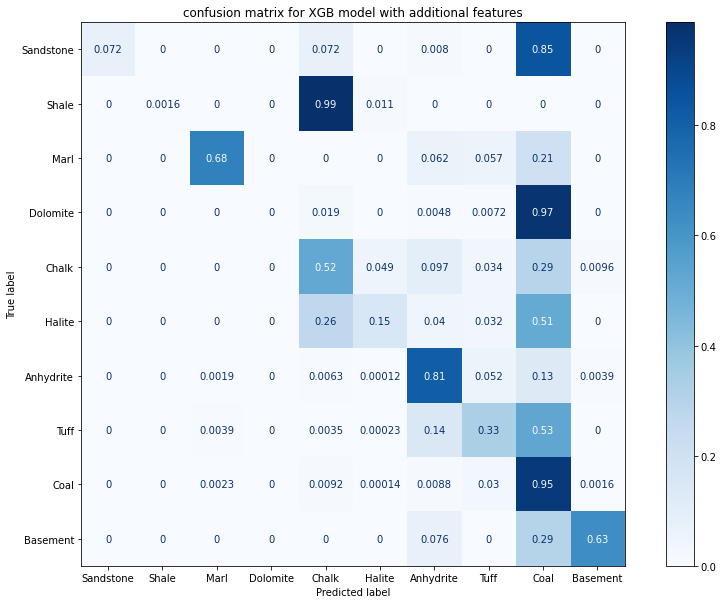

In [44]:
classes= ['Sandstone','Shale', 'Marl', 'Dolomite', 'Chalk', 'Halite', 'Anhydrite', 'Tuff', 'Coal','Basement']



from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
disp = plot_confusion_matrix(model_xgb, x_test_scaled, y_test,
                             cmap=plt.cm.Blues,
                             normalize="true", ax=ax)
disp.ax_.set_title("confusion matrix for XGB model with additional features")
ax.set(xticklabels=classes,yticklabels=classes)